In [1]:
import math
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

try:
    tf.compat.v1.enable_eager_execution()
except ValueError:
    pass

import matplotlib.pyplot as plt

print(tf.__version__)
print(tfp.__version__)

2.0.0-rc0
0.8.0-rc0


In [2]:
num_samples = 50000
num_bins = 100

# Bernoulli

The probability distribution of any single experiment that asks a yes–no question; the question results in a boolean-valued outcome, a single bit whose value is {success/yes/true/one} with probability p and {failure/no/false/zero} with probability 1-p. It can be used to represent a (possibly biased) coin toss where 1 and 0 would represent "heads" and "tails" (or vice versa).

### Bernoulli Probability Mass Function
$$ p^k (1-p)^{1-k}$$

In [3]:
def bernoulli_pmf (k, p):
    return p**k * (1-p)**(1-k)

In [4]:
bernoulli_prob = 0.8
bernoulli = tfd.Bernoulli(probs=bernoulli_prob)

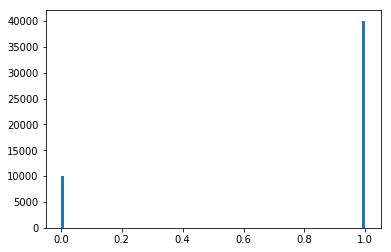

In [5]:
samples = bernoulli.sample(num_samples)
data = plt.hist(samples, bins=num_bins)

In [6]:
print("bernoulli_pmf: {}".format(np.mean(bernoulli_pmf(np.ones(num_samples), bernoulli_prob))))
print("TFD: {}".format(np.mean(samples)))

bernoulli_pmf: 0.8000000000000002
TFD: 0.801


# Binomial

The number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own boolean-valued outcome: {success/yes/true/one} (with probability p) or {failure/no/false/zero} (with probability 1 − p). For a single success/failure experiment, i.e., n = 1, the binomial distribution is a Bernoulli distribution. 

The binomial distribution is frequently used to model the number of successes in a sample of size n drawn with replacement from a population of size N. If the sampling is carried out without replacement, the draws are not independent and so the resulting distribution is a hypergeometric distribution, not a binomial one. However, for N much larger than n, the binomial distribution remains a good approximation, and is widely used.

### Binomial Probability Mass Function
$$ {n \choose k} p^k (1-p)^{ n-k}$$

In [7]:
def n_choose_k(n, k):
    return math.factorial(n) / ( math.factorial(k) * math.factorial(n-k))

def binomial_pmf(n, k, p):
    return n_choose_k(n, k) * p**k * (1-p)**(n-k)

In [8]:
binomial_total = 10
binomial_prob = 0.6
binomial = tfd.Binomial(total_count=binomial_total, probs=binomial_prob)

In [9]:
binomial_x = 3
print("binomial_pmf: {}".format(binomial_pmf(binomial_total, binomial_x, binomial_prob)))
print("TFD: {}".format(binomial.prob(binomial_x).numpy()))

binomial_pmf: 0.042467328000000006
TFD: 0.04246729984879494


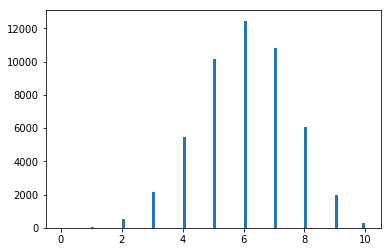

In [10]:
samples = binomial.sample(num_samples)
data = plt.hist(samples, bins=num_bins)

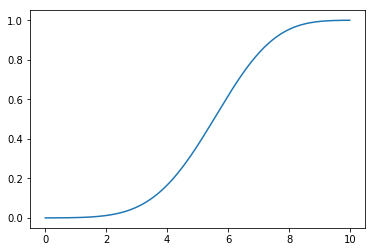

In [11]:
dist_range = np.arange(0, binomial_total, 0.01)
dist = binomial.cdf(dist_range)
data = plt.plot(dist_range, dist)

# Beta

### Beta Probability Density Function

$$ \frac{\gamma(\alpha+\beta)}{\gamma(\alpha) * \gamma(\beta)} * x^{\alpha-1} * (1-x)^{\beta-1} $$

In [12]:
def beta_pmf(x, alpha, beta):
    constant = math.gamma(alpha+beta)/(math.gamma(alpha) * math.gamma(beta))
    return constant * x**(alpha-1) * (1-x)**(beta-1)

In [13]:
beta_alpha = 8 # Concentration parameter associated with a 1 outcome.
beta_beta = 12 # Concentration parameter associated with a 0 outcome.
beta = tfd.Beta(concentration1 = beta_alpha, concentration0 = beta_beta)

In [14]:
beta_x = 0.4
print("beta_pmf: {}".format(beta_pmf(beta_x, beta_alpha, beta_beta)))
print("TFD: {}".format(beta.prob(beta_x).numpy()))

beta_pmf: 3.5941157550937866
TFD: 3.594118595123291


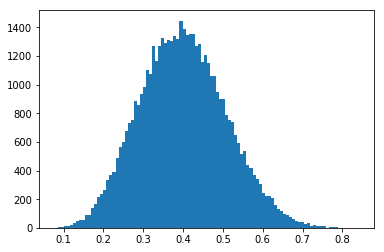

In [15]:
samples = beta.sample(num_samples)
data = plt.hist(samples, bins=num_bins)

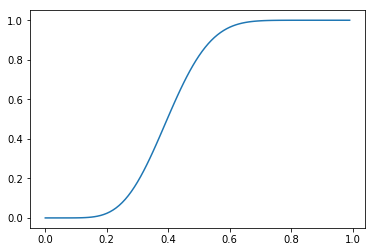

In [16]:
dist_range = np.arange(0, 1, 0.01)
dist = beta.cdf(dist_range)
data = plt.plot(dist_range, dist)

# Poisson

The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space.

### Example
The Poisson distribution may be useful to model events such as

* The number of meteorites greater than 1 meter diameter that strike Earth in a year
* The number of patients arriving in an emergency room between 10 and 11 pm
* The number of photons hitting a detector in a particular time interval

### Assumptions and validity
The Poisson distribution is an appropriate model if the following assumptions are true.

* k is the number of times an event occurs in an interval and k can take values 0, 1, 2, ....
* The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
* The average rate at which events occur is constant.
* Two events cannot occur at exactly the same instant; instead, at each very small sub-interval exactly one event either occurs or does not occur.

Or

* The actual probability distribution is given by a binomial distribution and the number of trials is sufficiently bigger than the number of successes one is asking about.

If these conditions are true, then k is a Poisson random variable, and the distribution of k is a Poisson distribution.

The average number of events in an interval is designated lambda.  (event rate is lambda)

### Poisson Probability Mass Function
$$ e^{-\lambda} * \frac{\lambda^k}{k!} $$

In [17]:
def poisson_pmf(l, k):
    return (l**k * math.exp(-l)) / math.factorial(k)

In [18]:
poisson_lambda = 10. 
poisson = tfd.Poisson(rate=poisson_lambda)

In [19]:
poisson_k = 3
print("poisson_pmf: {}".format(poisson_pmf(poisson_lambda, poisson_k)))
print("TFD: {}".format(poisson.prob(poisson_k).numpy()))

poisson_pmf: 0.007566654960414142
TFD: 0.007566655520349741


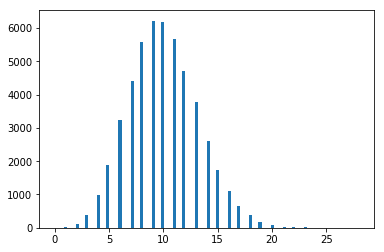

In [20]:
samples = poisson.sample(num_samples)
data = plt.hist(samples, bins=num_bins)

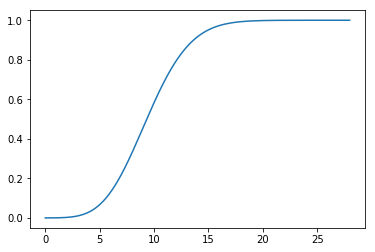

In [21]:
dist_range = np.arange(0, np.amax(samples), 0.01)
dist = poisson.cdf(dist_range)
data = plt.plot(dist_range, dist)

# Gamma

In [22]:
gamma_alpha = 8 # concentration
gamma_beta = 5 #rate

gamma = tfd.Gamma(concentration=gamma_alpha, rate=gamma_beta)

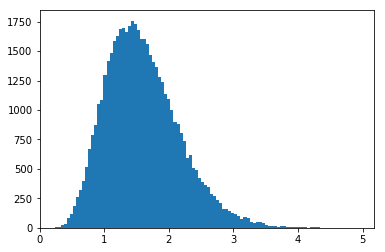

In [23]:
samples = gamma.sample(num_samples)
data = plt.hist(samples, bins=num_bins)

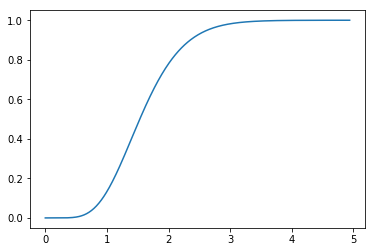

In [24]:
dist_range = np.arange(0, np.amax(samples), 0.01)
dist = gamma.cdf(dist_range)
data = plt.plot(dist_range, dist)

# Normal

In [25]:
norm_mean = 0
norm_std = 1
normal = tfd.Normal(loc=norm_mean, scale=norm_std)

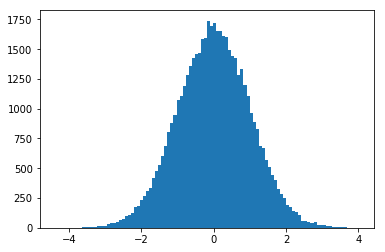

In [26]:
samples = normal.sample(num_samples)
data = plt.hist(samples, bins=num_bins)

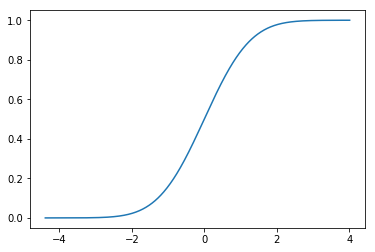

In [27]:
dist_range = np.arange(np.amin(samples), np.amax(samples), 0.01)
dist = normal.cdf(dist_range)
data = plt.plot(dist_range, dist)

# T

In [28]:
df = 5.
loc = 0.
scale = 1.
tstudent = tfd.StudentT(df=df, loc=loc, scale=scale)

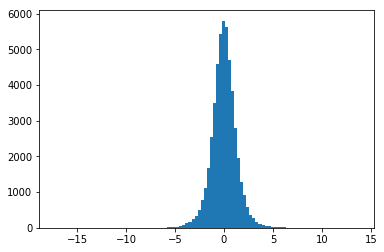

In [29]:
samples = tstudent.sample(num_samples)
data = plt.hist(samples, bins=num_bins)

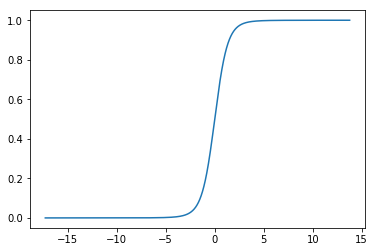

In [30]:
dist_range = np.arange(np.amin(samples), np.amax(samples), 0.01)
dist = tstudent.cdf(dist_range)
data = plt.plot(dist_range, dist)